# Projeto Dashboard Treino e Dieta - Gabriel Ferreira

## 1. Processso de ETL

In [37]:
# Instalando pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Carregando os dados
df = pd.read_csv('workouts.csv')

In [3]:
# Shape
df.shape

(9480, 14)

In [4]:
# Amostra dos dados
df.head(10)

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
0,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Back Extension (Weighted Hyperextension),NaN,NaN,0,normal,40.00,8.0,NaN,NaN,NaN
1,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Back Extension (Weighted Hyperextension),NaN,NaN,1,normal,42.50,7.0,NaN,NaN,NaN
2,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Unilateral Calf Extension (Machine),NaN,NaN,0,normal,52.50,8.0,NaN,NaN,NaN
3,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Unilateral Calf Extension (Machine),NaN,NaN,1,failure,52.50,8.0,NaN,NaN,NaN
4,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Crunch Hammer Machine,NaN,NaN,0,normal,57.50,7.0,NaN,NaN,NaN
5,Evening workout 🏋️,"7 Jan 2026, 19:48","7 Jan 2026, 20:14","Lower back, pantu e abs",Crunch Hammer Machine,NaN,NaN,1,failure,57.50,7.0,NaN,NaN,NaN
6,Lower,"6 Jan 2026, 19:46","6 Jan 2026, 21:24",NaN,Hip Adduction (Machine),NaN,NaN,0,normal,90.00,5.0,NaN,NaN,NaN
7,Lower,"6 Jan 2026, 19:46","6 Jan 2026, 21:24",NaN,Hip Adduction (Machine),NaN,NaN,1,failure,90.00,5.0,NaN,NaN,NaN
8,Lower,"6 Jan 2026, 19:46","6 Jan 2026, 21:24",NaN,Hip Adduction (Machine),NaN,NaN,2,failure,86.25,6.0,NaN,NaN,NaN
9,Lower,"6 Jan 2026, 19:46","6 Jan 2026, 21:24",NaN,Straight Leg Deadlift,NaN,NaN,0,normal,100.00,7.0,NaN,NaN,NaN


In [5]:
# Tipo de dados
df.dtypes

title                object
start_time           object
end_time             object
description          object
exercise_title       object
superset_id         float64
exercise_notes       object
set_index             int64
set_type             object
weight_kg           float64
reps                float64
distance_km         float64
duration_seconds    float64
rpe                 float64
dtype: object

Observa-se que o start_time e end_time estão como object e deveriam ser datas.

In [6]:
# Colunas
df.columns

Index(['title', 'start_time', 'end_time', 'description', 'exercise_title',
       'superset_id', 'exercise_notes', 'set_index', 'set_type', 'weight_kg',
       'reps', 'distance_km', 'duration_seconds', 'rpe'],
      dtype='object')

In [7]:
# Criação do dicionário de dados com a descrição de cada variável
df_dict = {
    "title": "Nome do treino (Push, Pull, Legs, Push 1, Pull 1, Treino A, etc.",
    "start_time": "Data e horárrio do início do treino.",
    "end_time": "Data e horárrio do final do treino.",
    "description": "Comentários adicionados ao final do treino.",
    "exercise_title": "Nome do exercício realizado.",
    "superset_id": "Index para identificar supersets.",
    "exercise_notes": "Anotacoes realizadas durante a realizacao do exercicio.",
    "set_index": "Numero da serie realizada",
    "set_type": "Tipo de serie (Normal, Failure, Warmup).",
    "weight_kg": "Carga levantado na serie.",
    "reps": "Numero de repeticoes realizadas na serie.",
    "distance_km": "Distancia em kilometros realizadas no exercicio cardiovascular",
    "duration_segundos": "Duracao em segundos do exercicio cardiovascular ou exercicio que e controlado por tempo.",
    "rpe": "Rating of Perceived Exertion = Escala de Esforço Percebido. Escala subjetiva para avaliar a intensidade do esforço no treino."
}

Não tem a necessidade de se obter o horario incial e final do treino juntamente com a data, portanto precisamos quebrar em uma coluna com a data do treino (data_treino) e também o tempo de treino (horario do inicio_treino e final_treino).

### Análise Exploratória

In [8]:
# Verificando novamente tipo de dados
df.dtypes

title                object
start_time           object
end_time             object
description          object
exercise_title       object
superset_id         float64
exercise_notes       object
set_index             int64
set_type             object
weight_kg           float64
reps                float64
distance_km         float64
duration_seconds    float64
rpe                 float64
dtype: object

In [9]:
# Resumo estatístico (variáveis numéricas)
df.describe()

,superset_id,set_index,weight_kg,reps,distance_km,duration_seconds,rpe
count,0.0,9480.000000,8776.00000,9151.000000,1.0,329.000000,0.0
mean,NaN,1.140506,52.49430,9.469238,5.0,1039.659574,NaN
std,NaN,1.180906,37.69122,2.975475,NaN,247.233633,NaN
min,NaN,0.000000,2.00000,4.000000,5.0,0.000000,NaN
25%,NaN,0.000000,21.25000,8.000000,5.0,900.000000,NaN
50%,NaN,1.000000,47.50000,9.000000,5.0,1200.000000,NaN
75%,NaN,2.000000,75.00000,11.000000,5.0,1200.000000,NaN
max,NaN,9.000000,285.00000,111.000000,5.0,1800.000000,NaN


In [10]:
# Visualizando o total de linhas por coluna
df.count()

title               9480
start_time          9480
end_time            9480
description         4278
exercise_title      9480
superset_id            0
exercise_notes      1068
set_index           9480
set_type            9480
weight_kg           8776
reps                9151
distance_km            1
duration_seconds     329
rpe                    0
dtype: int64

In [11]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
print(valores_ausentes)

superset_id         9480
rpe                 9480
distance_km         9479
duration_seconds    9151
exercise_notes      8412
description         5202
weight_kg            704
reps                 329
title                  0
start_time             0
exercise_title         0
end_time               0
set_type               0
set_index              0
dtype: int64



superset_id == nunca utilizo então faz sentido estar com todos valores ausentes
rpe == mesmo do superset_id
distance_km == somente se colocar na esteira.. geralmente nao coloco pois faço por tempo
duration_seconds == duracao do cardio..só vai estar presente nos exercicios de cardio
exercise_notes == comentarios dos exercicios, nem sempre é necessário ter comentario
description == descrição do treinamento, se coloca ao finalizar o treino, nem sempre tbm colocamos


weight_kg = alguns exercicios nao tem carga, como exercicios com peso corporal e cardio, mas irei analisar
reps = analisemos

In [12]:
# Valores ausentes coluna weight_kg
# Filtrando linhas onde 'wight_kg' é NaN e não são cardio
exercicios_excluidos = ['Treadmill', 'Stair Machine (Floors)', 'Stair Machine (Steps)', 'Stair Machine','Spinning', 'Walking', 'Air Bike']

linhas_ausentes_carga = df[
    df['weight_kg'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_carga

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
1678,Upper I,"26 May 2025, 19:46","26 May 2025, 21:23",NaN,Chest Dip (Assisted),NaN,NaN,0,normal,NaN,8.0,NaN,NaN,NaN
1679,Upper I,"26 May 2025, 19:46","26 May 2025, 21:23",NaN,Chest Dip (Assisted),NaN,NaN,1,failure,NaN,8.0,NaN,NaN,NaN
1737,Upper I,"19 May 2025, 19:54","19 May 2025, 21:43",NaN,Chest Dip (Assisted),NaN,NaN,1,failure,NaN,7.0,NaN,NaN,NaN
3092,Push 2 e Pull 2,"28 Dec 2024, 09:18","28 Dec 2024, 10:59",Pull 2,Romanian Chair Sit Ups,NaN,NaN,0,normal,NaN,9.0,NaN,NaN,NaN
3093,Push 2 e Pull 2,"28 Dec 2024, 09:18","28 Dec 2024, 10:59",Pull 2,Romanian Chair Sit Ups,NaN,NaN,1,normal,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349,Treino A - Costas + Biceps,"27 Nov 2023, 17:19","27 Nov 2023, 18:18",NaN,Back Extension (Hyperextension),NaN,NaN,3,normal,NaN,10.0,NaN,NaN,NaN
9456,Treino A - Costas + Biceps,"21 Nov 2023, 17:54","21 Nov 2023, 18:48",NaN,Back Extension (Hyperextension),NaN,NaN,0,normal,NaN,10.0,NaN,NaN,NaN
9457,Treino A - Costas + Biceps,"21 Nov 2023, 17:54","21 Nov 2023, 18:48",NaN,Back Extension (Hyperextension),NaN,NaN,1,normal,NaN,10.0,NaN,NaN,NaN
9458,Treino A - Costas + Biceps,"21 Nov 2023, 17:54","21 Nov 2023, 18:48",NaN,Back Extension (Hyperextension),NaN,NaN,2,normal,NaN,10.0,NaN,NaN,NaN


In [13]:
# Visualizando onde temos valores ausentes
linhas_ausentes_carga = df[
    df['weight_kg'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_carga['exercise_title'].value_counts()


exercise_title
Back Extension (Hyperextension)    201
Pull Up                             86
Knee Raise Parallel Bars            53
Leg Raise Parallel Bars              8
Bench Dip                            7
Decline Crunch                       4
Chin Up                              4
Chest Dip (Assisted)                 3
Romanian Chair Sit Ups               3
Decline Crunch (Weighted)            2
Squat (Smith Machine)                1
Squat (Bodyweight)                   1
Push Up                              1
Bicep Curl (Machine)                 1
Plank                                1
Name: count, dtype: int64

Back Extension (Hyperextension), Pull Up, Knee Raise Parallel Bars, Leg Raise Parallel Bars, Bench Dip, Decline Crunch, Chin Up, Chest Dip (Assisted),
Romanian Chair Sit Ups, Decline Crunch (Weighted), Squat (Bodyweight), Push Up  e Plank fazem sentido valores ausentes pois são exercicios com peso do corpo apenas, mas Bicep Curl (Machine) não e provavelmente o Squat (Smith Machine) foi um aquecimento sem carga, mas vamos analisar

In [14]:
# Filtrando esses dois exercicios com valores nulos em weight_kg
exercicios_interesse = [
    'Squat (Smith Machine)',
    'Bicep Curl (Machine)'
]

df[
    df['weight_kg'].isna() &
    df['exercise_title'].isin(exercicios_interesse)
]

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
5208,Perna Completo,"31 Jul 2024, 07:42","31 Jul 2024, 09:01",NaN,Squat (Smith Machine),NaN,NaN,0,warmup,NaN,30.0,NaN,NaN,NaN
6582,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,2,failure,NaN,9.0,NaN,NaN,NaN


Confirmamos Smith Machine como aquecimento, mas provavelmente temos um erro no exercicio de biceps, pois é uma série até a falha e o set_index é 2, o que siginfica que é a terceira série desse exercicio

In [15]:
# Analisando exatamente esse exercicio desse dia
df[
    (df['title'] == 'Costas + Biceps + Lombar - Treino 2') &
    (df['exercise_title'] == 'Bicep Curl (Machine)') &
    (df['start_time'].str.contains('14 May 2024'))
]


,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
6580,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,0,normal,54.0,12.0,NaN,NaN,NaN
6581,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,1,failure,54.0,10.0,NaN,NaN,NaN
6582,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,2,failure,NaN,9.0,NaN,NaN,NaN


Após analise, comprovamos que de fato houve um erro na imputação manual, refletindo na ausência desse valor, que é 54.0 kg

In [16]:
# Imputando o valor correto nessa série
df.loc[6582, 'weight_kg'] = 54.0

In [17]:
# Revalidando a serie correta
df[
    (df['title'] == 'Costas + Biceps + Lombar - Treino 2') &
    (df['exercise_title'] == 'Bicep Curl (Machine)') &
    (df['start_time'].str.contains('14 May 2024'))
]

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
6580,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,0,normal,54.0,12.0,NaN,NaN,NaN
6581,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,1,failure,54.0,10.0,NaN,NaN,NaN
6582,Costas + Biceps + Lombar - Treino 2,"14 May 2024, 11:11","14 May 2024, 12:36",NaN,Bicep Curl (Machine),NaN,NaN,2,failure,54.0,9.0,NaN,NaN,NaN


In [18]:
# Valores ausentes coluna REPS
# Filtrando linhas onde 'reps' é NaN e não são cardio
exercicios_excluidos = ['Treadmill', 'Stair Machine (Floors)', 'Stair Machine (Steps)', 'Stair Machine','Spinning', 'Walking', 'Air Bike']

linhas_ausentes_repeticoes = df[
    df['reps'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_repeticoes

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
7960,(S1 ) Peito + Triceps + Abs - Treino 1,"26 Feb 2024, 10:54","26 Feb 2024, 11:53",Treino 6,Plank,NaN,NaN,0,normal,NaN,NaN,NaN,48.0,NaN


Prancha também é um exercicio no qual não o fato de não se ter presente repeitções está tudo bem.

### Detecção de Outliers 

In [20]:
# Função para detectar outliers usando o método IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

In [22]:
# Detectando e exibindo o total de outliers por coluna
colunas = ['weight_kg', 'reps']
for coluna in colunas:
    outliers = detectar_outliers(df, coluna)
    print(f"Total de outliers em '{coluna}': {len(outliers)}")


Total de outliers em 'weight_kg': 119
Total de outliers em 'reps': 239


In [23]:
# Detectar e exibir outliers para a coluna 'carga_kg'
outliers_carga_kg = detectar_outliers(df, 'weight_kg')

if not outliers_carga_kg.empty:
    print("Outliers em 'weight_kg (119) ':")
    print(outliers_carga_kg[['exercise_title', 'start_time', 'weight_kg', 'reps']])

Outliers em 'weight_kg (119) ':
           exercise_title          start_time  weight_kg  reps
11    Leg Press (Machine)   6 Jan 2026, 19:46      280.0   6.0
12    Leg Press (Machine)   6 Jan 2026, 19:46      280.0   5.0
70    Leg Press (Machine)  30 Dec 2025, 18:26      280.0   5.0
71    Leg Press (Machine)  30 Dec 2025, 18:26      260.0   6.0
124   Leg Press (Machine)  23 Dec 2025, 11:58      280.0   7.0
...                   ...                 ...        ...   ...
9191  Leg Press (Machine)   6 Dec 2023, 17:48      240.0   9.0
9402  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9403  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9404  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9405  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0

[119 rows x 4 columns]


In [26]:
# 1. Detecta todos os outliers novamente
outliers_original = detectar_outliers(df, 'weight_kg')

# 2. Agrupa e conta quantos outliers existem por título de exercício
contagem_outliers = outliers_original['exercise_title'].value_counts()

print("Distribuição de Outliers por Exercício:")
print(contagem_outliers)

Distribuição de Outliers por Exercício:
exercise_title
Leg Press (Machine)    119
Name: count, dtype: int64


Legpress é um exercicio onde o peso absoluto é significativamente maior comparado aos outros exercícios mas não necessariamente são outliers

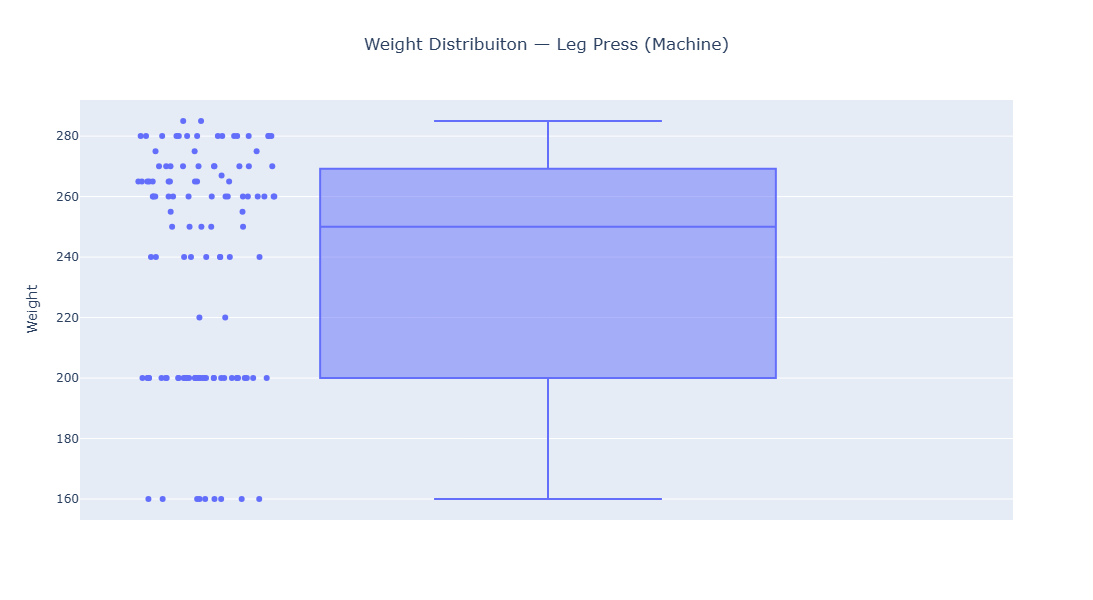

In [62]:
# Leg Press (Machine)
exercise_name = "Leg Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="weight_kg",points="all",hover_data=["reps","set_index","set_type","rpe","start_time"],title=f"Weight Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Weight",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Valores corretos, como meu treinamento é com base em sobrecarga progressiva, faz sentido os valores proximos de 280 estarem com poucos registros pois são as ultimas cargas levantadas.

In [29]:
# Detectar e exibir outliers para a coluna 'repeticoes'
outliers_repeticoes = detectar_outliers(df, 'reps')

if not outliers_repeticoes.empty:
    print("Outliers em 'repeticoes (209) ':")
    print(outliers_repeticoes[['exercise_title','weight_kg', 'reps']])

Outliers em 'repeticoes (209) ':
                       exercise_title  weight_kg  reps
3798    Standing Calf Raise (Machine)       20.0  30.0
3799    Standing Calf Raise (Machine)       40.0  25.0
3800    Standing Calf Raise (Machine)       60.0  20.0
3805    Standing Calf Raise (Machine)       40.0  24.0
3806    Standing Calf Raise (Machine)       20.0  30.0
...                               ...        ...   ...
8845   Incline Bench Press (Dumbbell)       17.5  20.0
8895  Seated Shoulder Press (Machine)       37.5  20.0
8959  Seated Shoulder Press (Machine)       37.5  20.0
9043  Seated Shoulder Press (Machine)       37.5  20.0
9220             Cable Fly Crossovers       10.0  16.0

[239 rows x 3 columns]


In [36]:
# 1. Detecta todos os outliers novamente
outliers_original = detectar_outliers(df, 'reps')

# 2. Agrupa e conta quantos outliers existem por título de exercício
contagem_outliers = outliers_original['exercise_title'].value_counts()

print("Distribuição de Outliers por Exercício:")
print(contagem_outliers)

Distribuição de Outliers por Exercício:
exercise_title
Standing Calf Raise (Machine)               117
Incline Bench Press (Dumbbell)               18
Lateral Raise (Dumbbell)                     11
Calf Extension (Machine)                      8
Chest Fly (Machine)                           8
Triceps Rope Pushdown                         7
Lat Pulldown (Cable)                          6
Triceps Extension (Cable)                     6
Single Arm Tricep Extension (Dumbbell)        6
Crunch (Machine)                              5
Single Arm Lateral Raise (Cable)              4
Seated Cable Row - V Grip (Cable)             4
Preacher Curl (Machine)                       4
Lat Pulldown (Machine)                        4
Iso-Lateral High Row (Machine)                4
Lateral Raise (Machine)                       4
Chest Press (Machine)                         4
Bicep Curl (Dumbbell)                         3
Seated Wrist Extension (Barbell)              3
Seated Shoulder Press (Machine)  

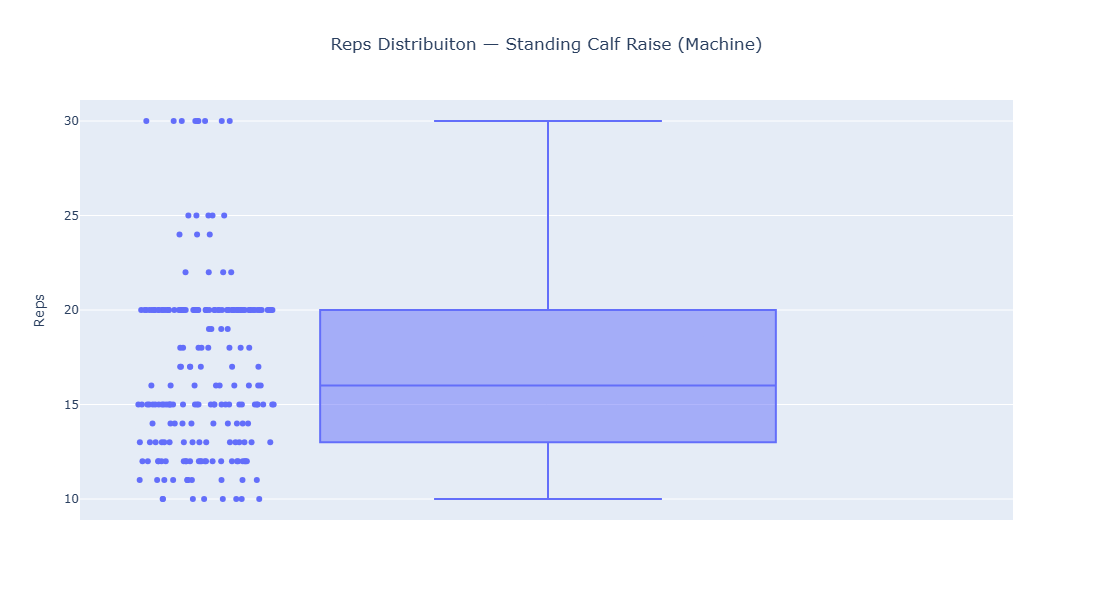

In [47]:
# Para Standing Calf Raise (Machine)
exercise_name = "Standing Calf Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

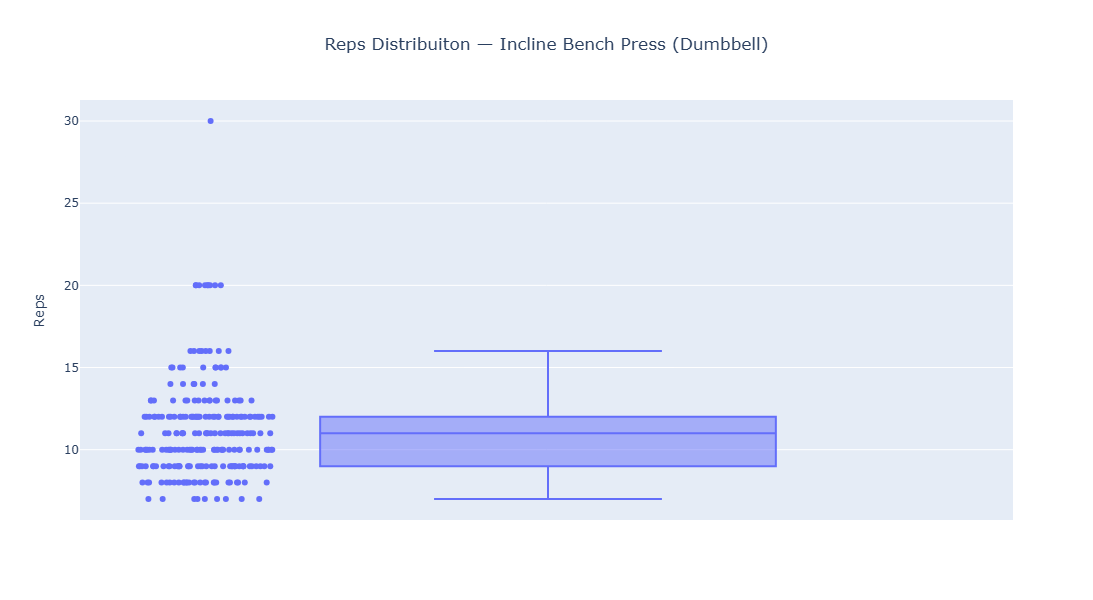

In [48]:
# Para Incline Bench Press (Dumbbell)
exercise_name = "Incline Bench Press (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de warm up)

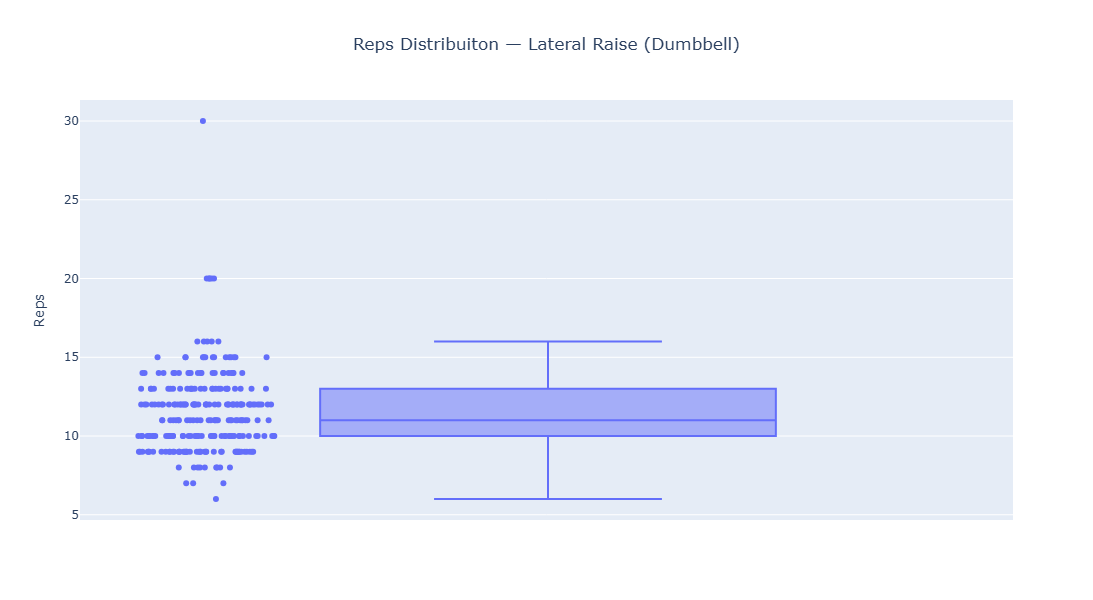

In [49]:
# Para Lateral Raise (Dumbbell)
exercise_name = "Lateral Raise (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de warm up/ carga baixa)

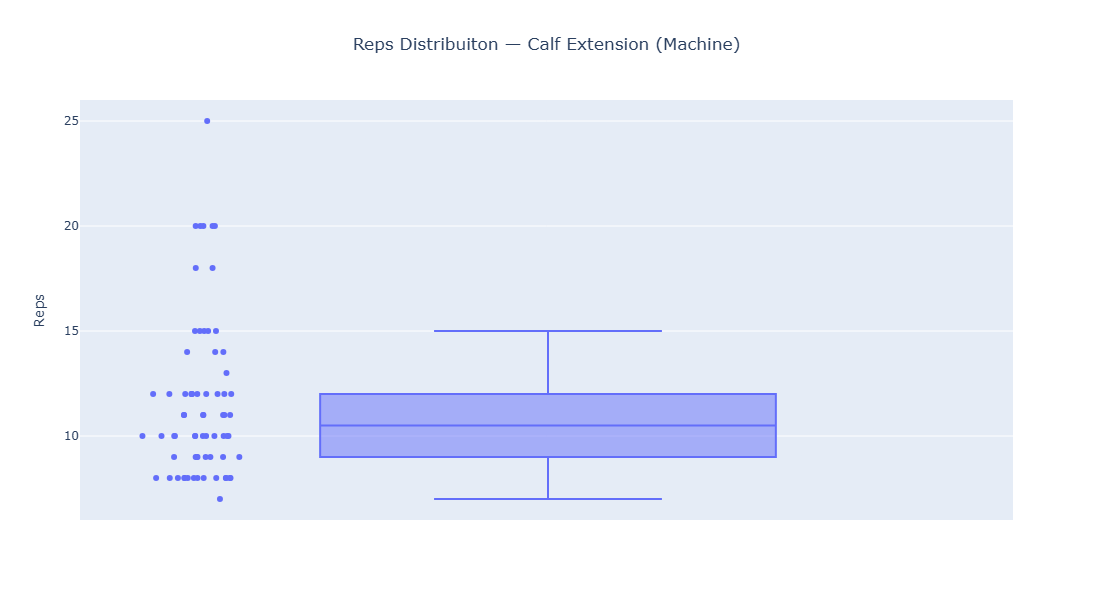

In [50]:
# Calf Extension (Machine)
exercise_name = "Calf Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

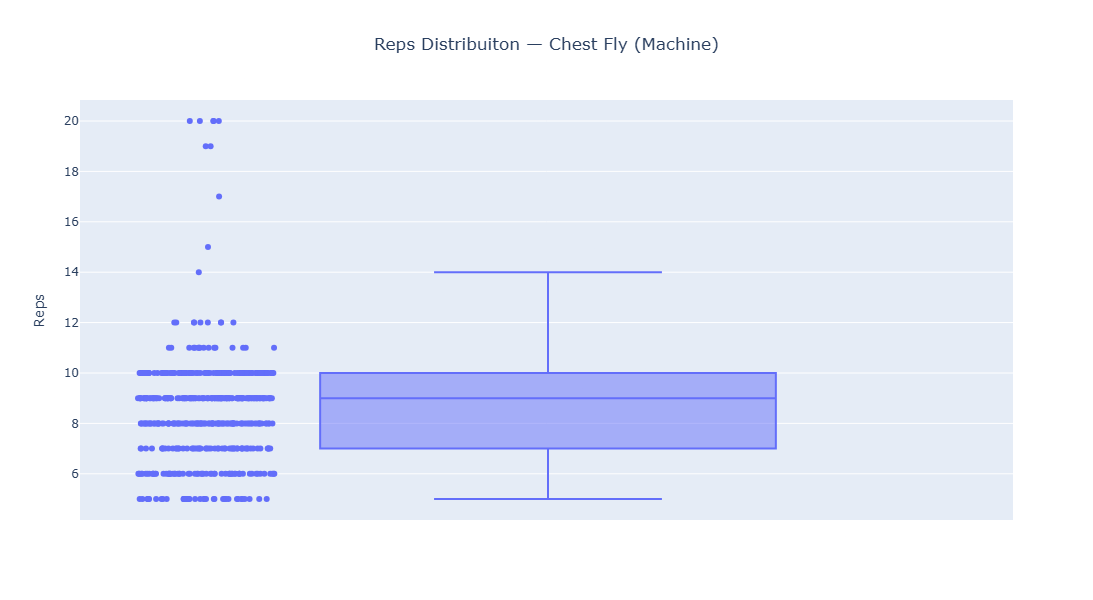

In [51]:
# Chest Fly (Machine)
exercise_name = "Chest Fly (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

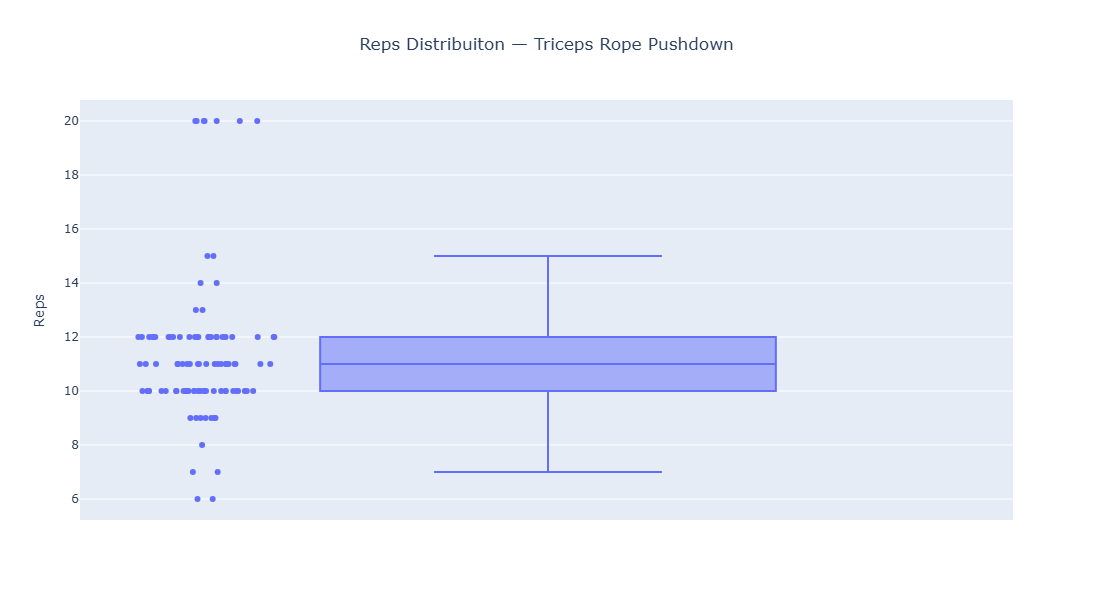

In [52]:
# Triceps Rope Pushdown
exercise_name = "Triceps Rope Pushdown"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

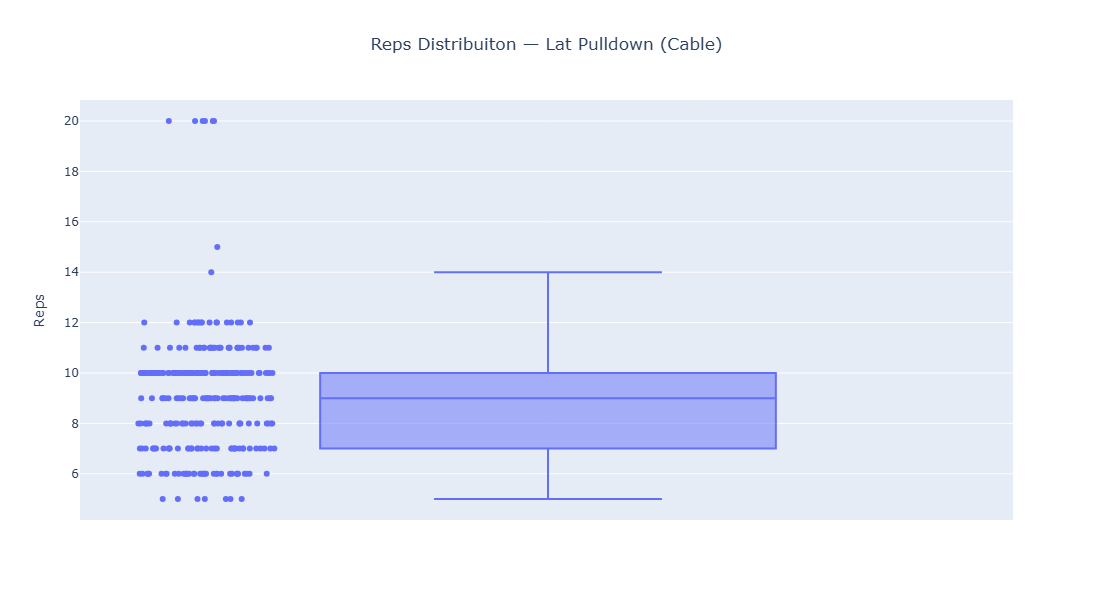

In [53]:
# Lat Pulldown (Cable)
exercise_name = "Lat Pulldown (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

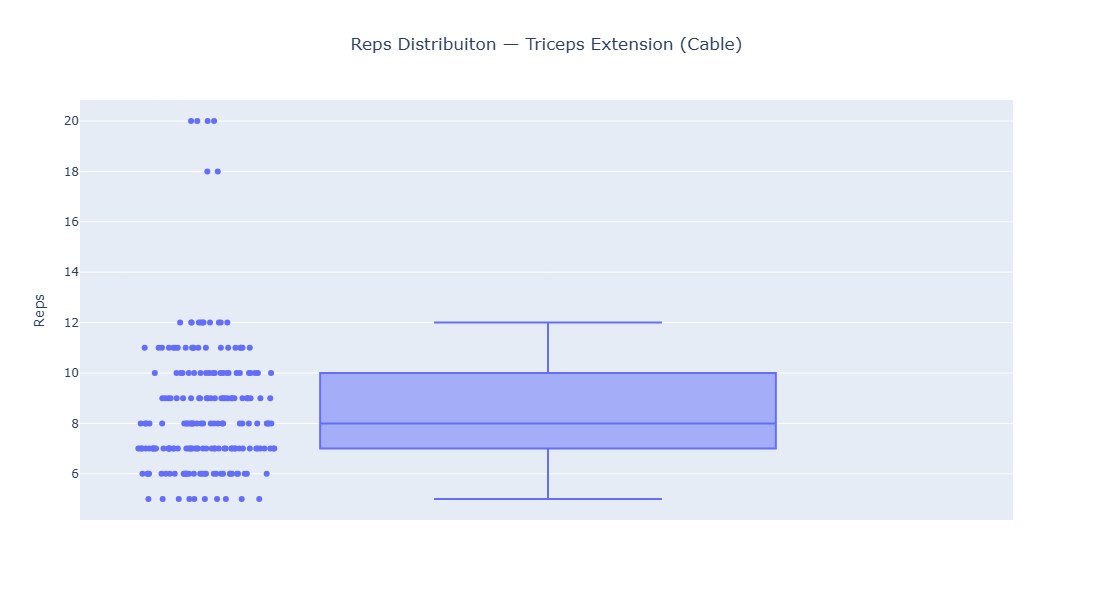

In [54]:
# Triceps Extension (Cable)
exercise_name = "Triceps Extension (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

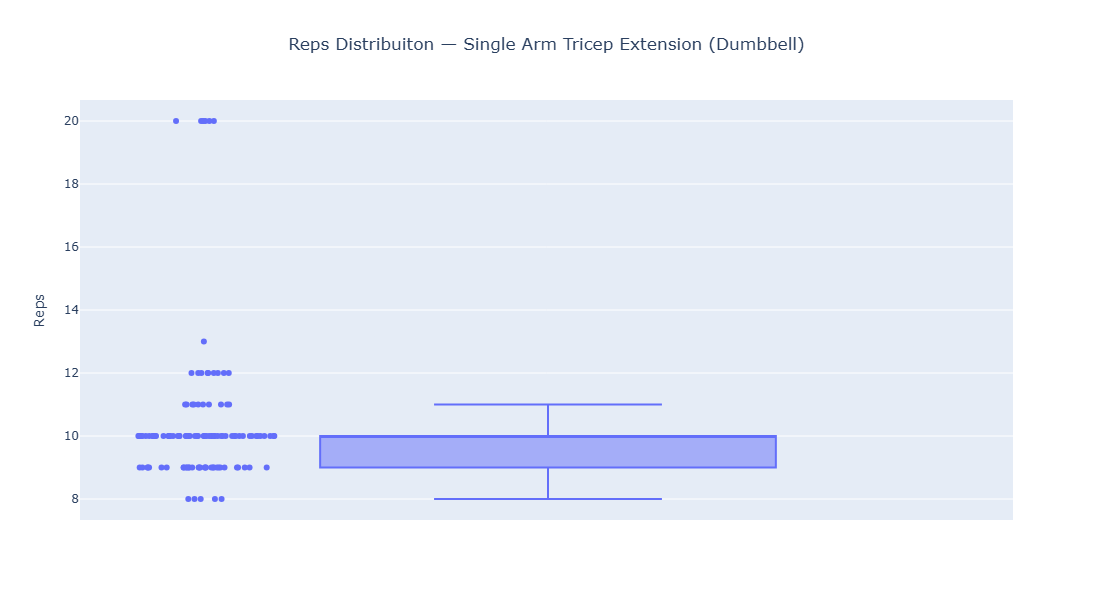

In [55]:
# Single Arm Tricep Extension (Dumbbell)
exercise_name = "Single Arm Tricep Extension (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

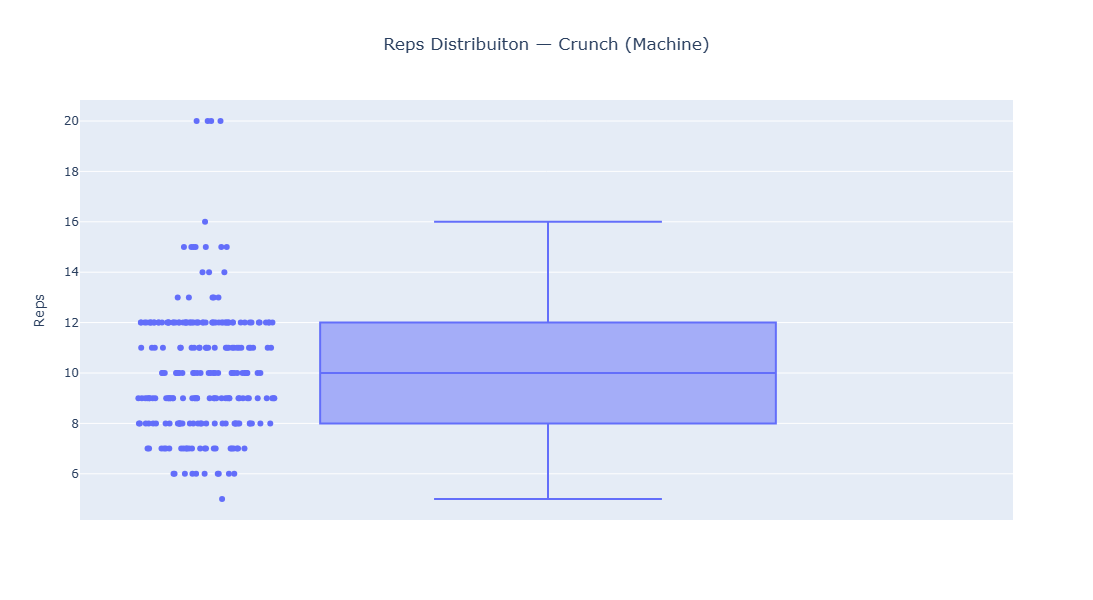

In [56]:
# Crunch (Machine)
exercise_name = "Crunch (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

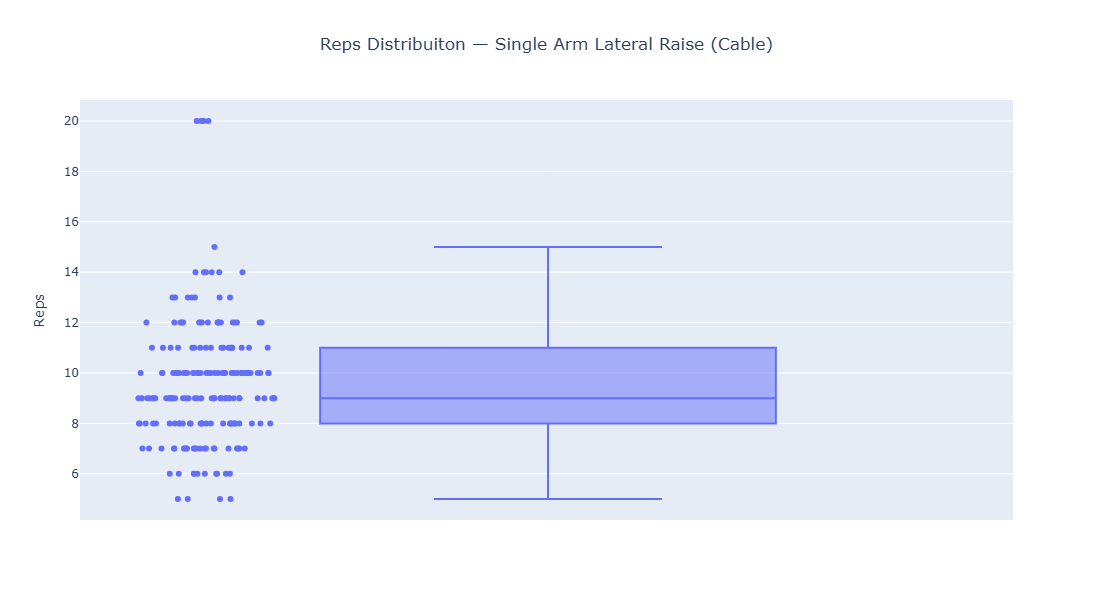

In [57]:
# Single Arm Lateral Raise (Cable)
exercise_name = "Single Arm Lateral Raise (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

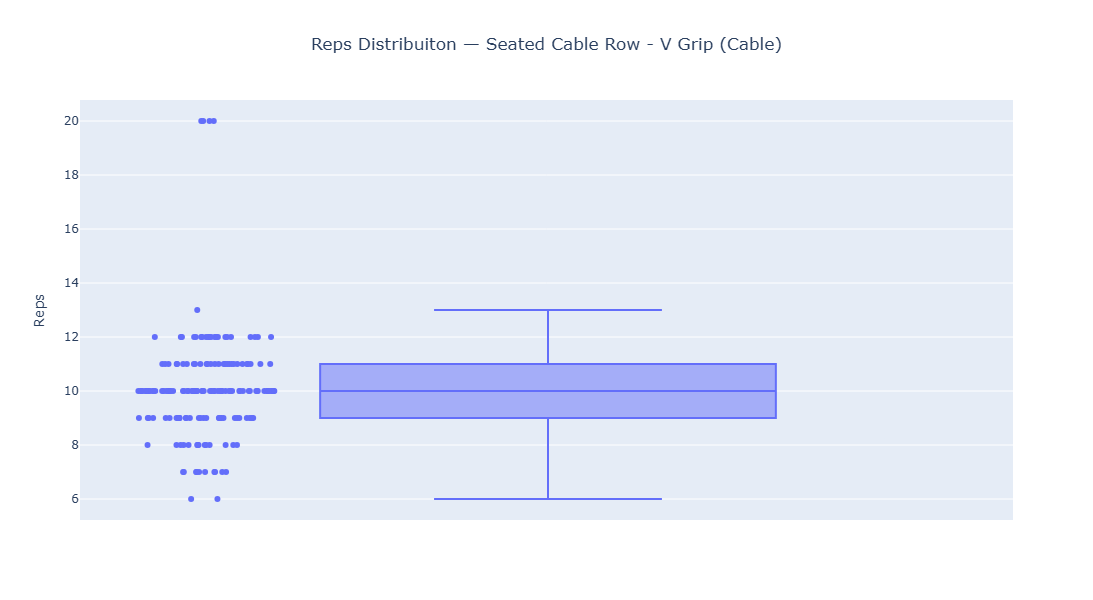

In [58]:
# Seated Cable Row - V Grip (Cable)
exercise_name = "Seated Cable Row - V Grip (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

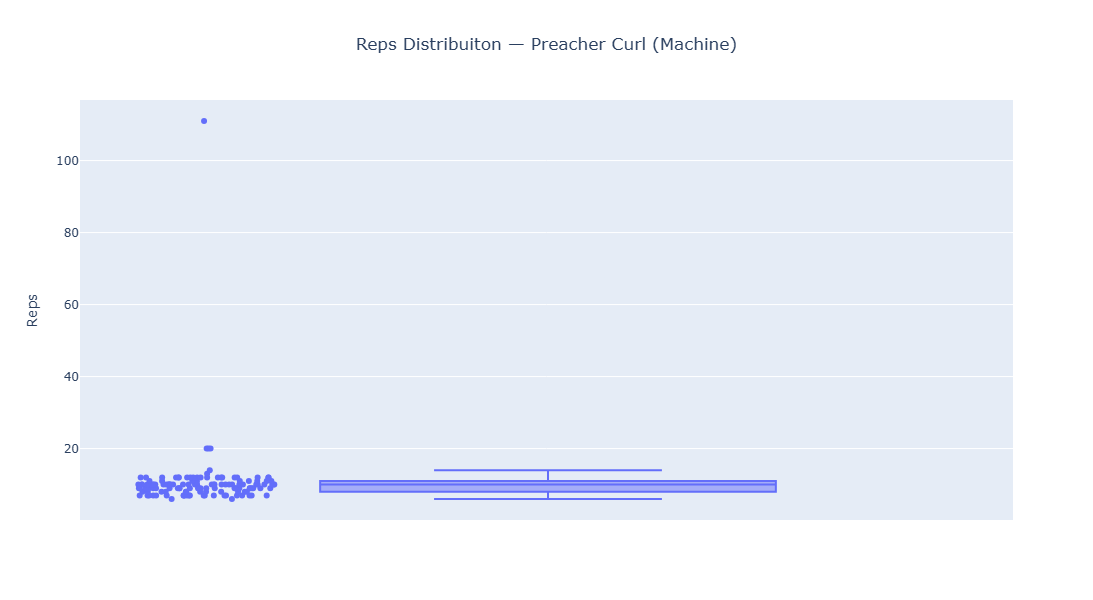

In [59]:
# Preacher Curl (Machine)
exercise_name = "Preacher Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Aqui sim temos um valor incorreto, onde esta 111 na realidade são 11 repetições.

In [66]:
# Analisando exatamente esse exercicio desse dia
df[
    (df['exercise_title'] == 'Preacher Curl (Machine)') &
    (df['start_time'].str.contains('23 Jan 2024'))
]

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
8542,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,0,normal,48.75,12.0,NaN,NaN,NaN
8543,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,1,normal,48.75,111.0,NaN,NaN,NaN
8544,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,2,normal,48.75,12.0,NaN,NaN,NaN


In [67]:
# Imputando o valor correto nessa série
df.loc[8543, 'reps'] = 11.0

In [68]:
# # Revalidando a serie correta
df[
    (df['exercise_title'] == 'Preacher Curl (Machine)') &
    (df['start_time'].str.contains('23 Jan 2024'))
]

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
8542,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,0,normal,48.75,12.0,NaN,NaN,NaN
8543,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,1,normal,48.75,11.0,NaN,NaN,NaN
8544,Treino B - Costas + Biceps,"23 Jan 2024, 11:09","23 Jan 2024, 12:09",NaN,Preacher Curl (Machine),NaN,NaN,2,normal,48.75,12.0,NaN,NaN,NaN


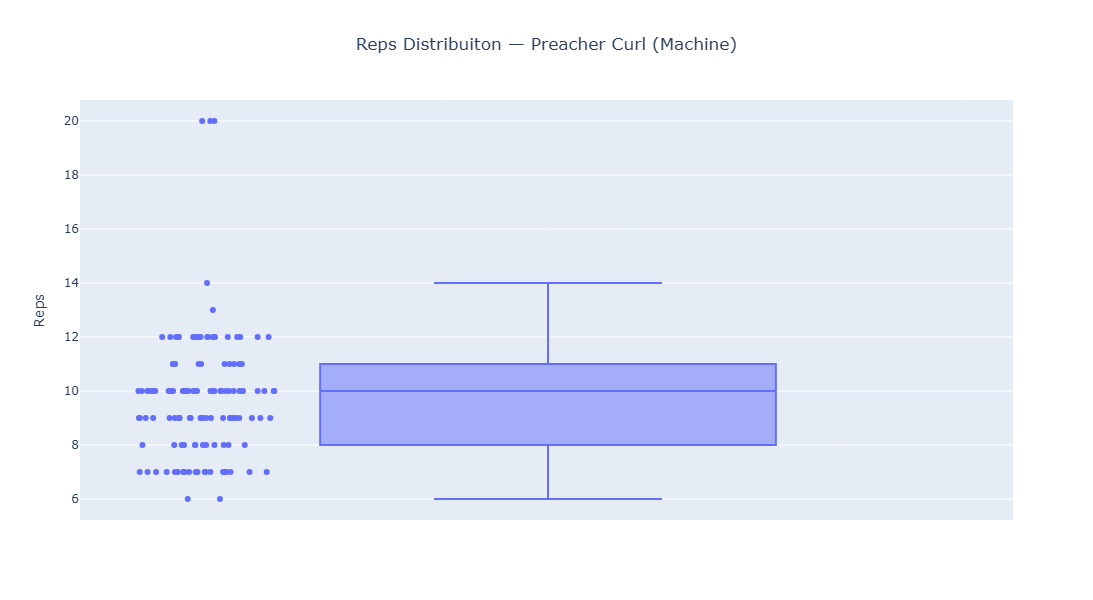

In [69]:
# Gráfico Após Correção -  Preacher Curl (Machine)
exercise_name = "Preacher Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Agora sim, a justifica permanece como não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

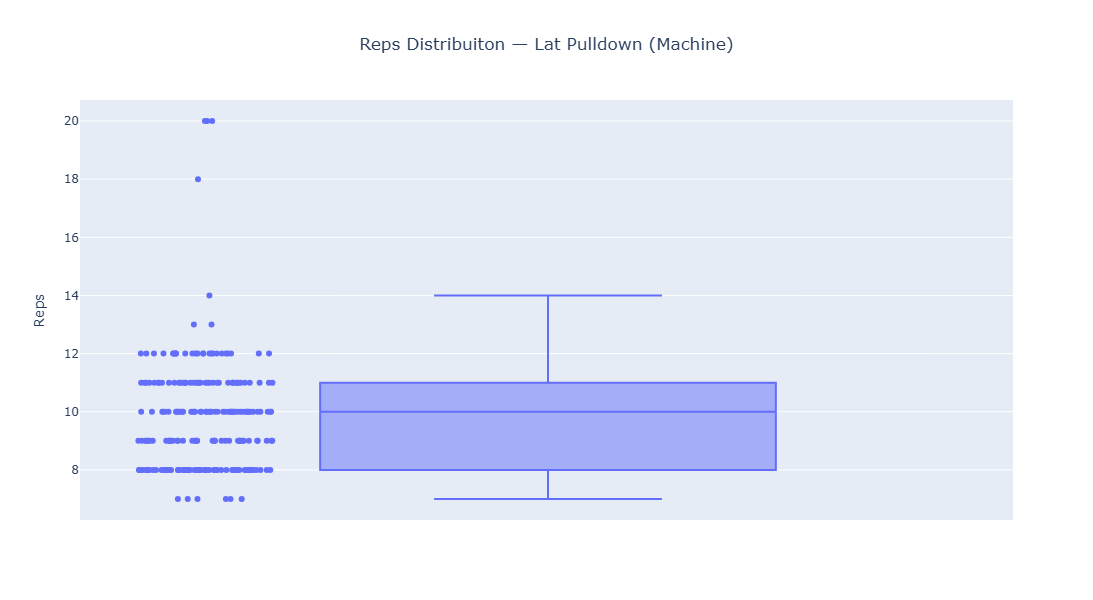

In [70]:
# Lat Pulldown (Machine)
exercise_name = "Lat Pulldown (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

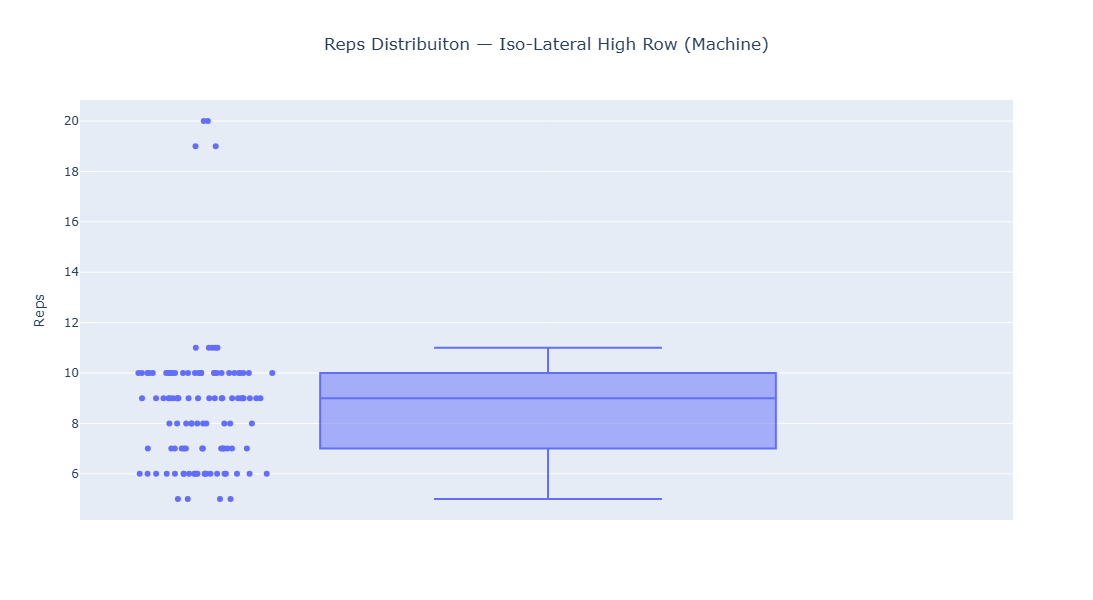

In [71]:
# Iso-Lateral High Row (Machine)
exercise_name = "Iso-Lateral High Row (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

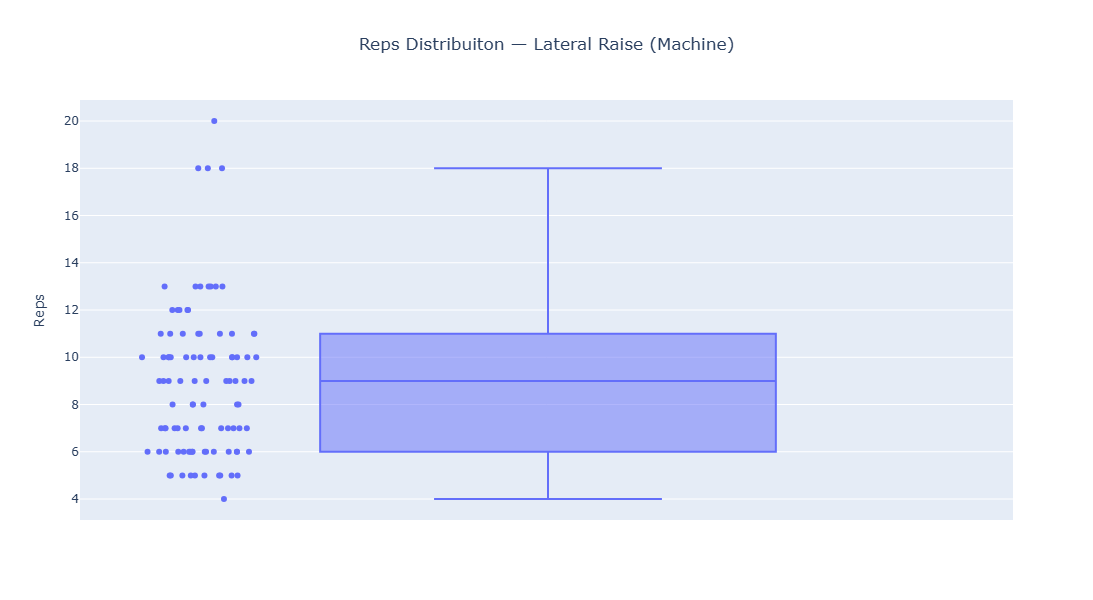

In [72]:
# Lateral Raise (Machine)
exercise_name = "Lateral Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

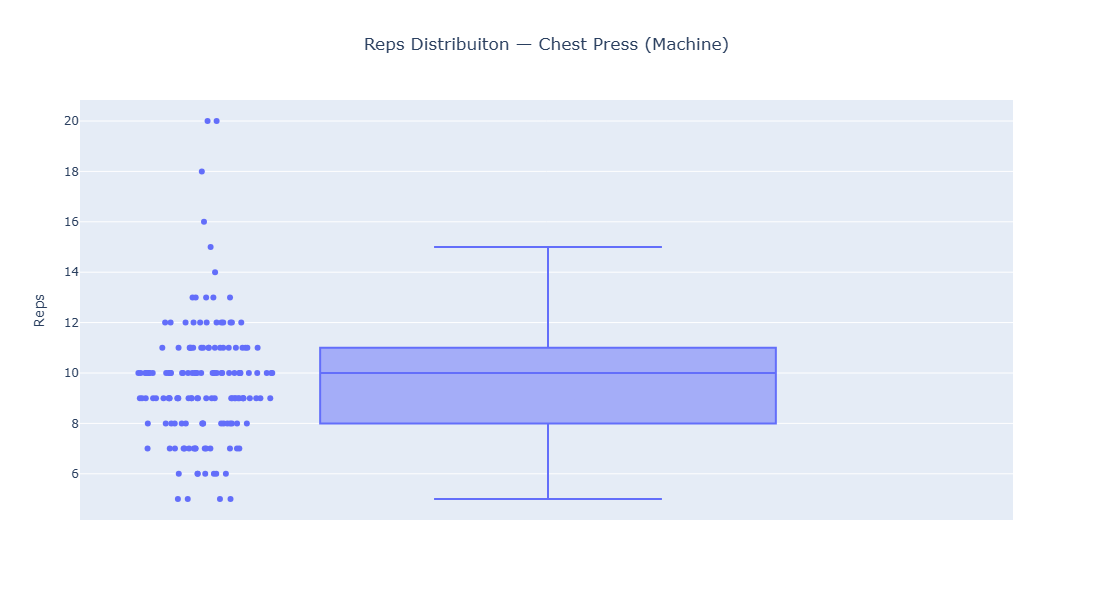

In [73]:
# Chest Press (Machine)
exercise_name = "Chest Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

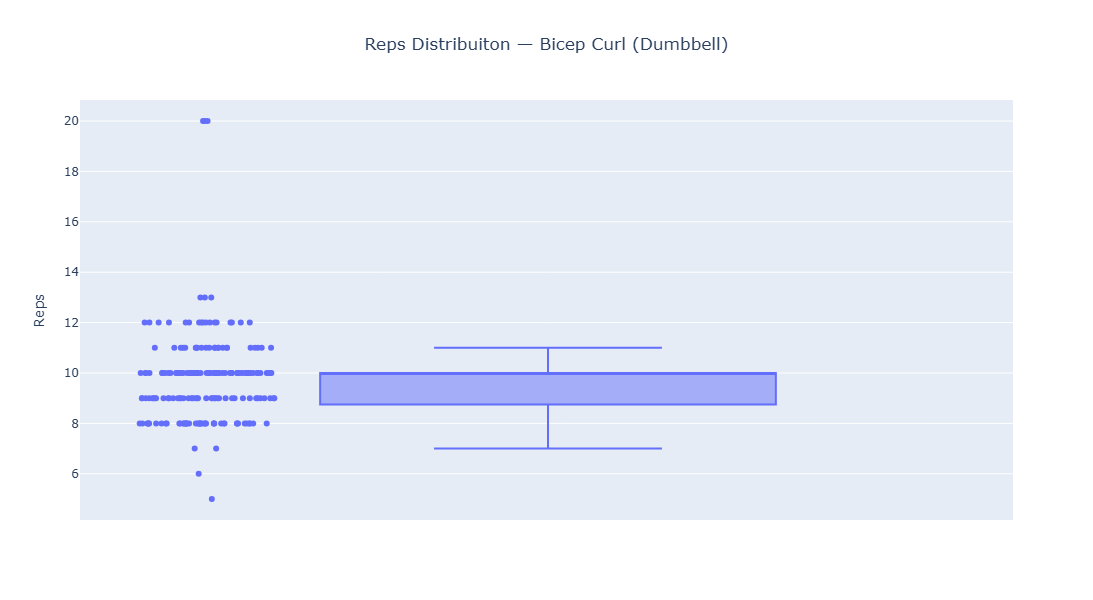

In [74]:
# Bicep Curl (Dumbbell)
exercise_name = "Bicep Curl (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

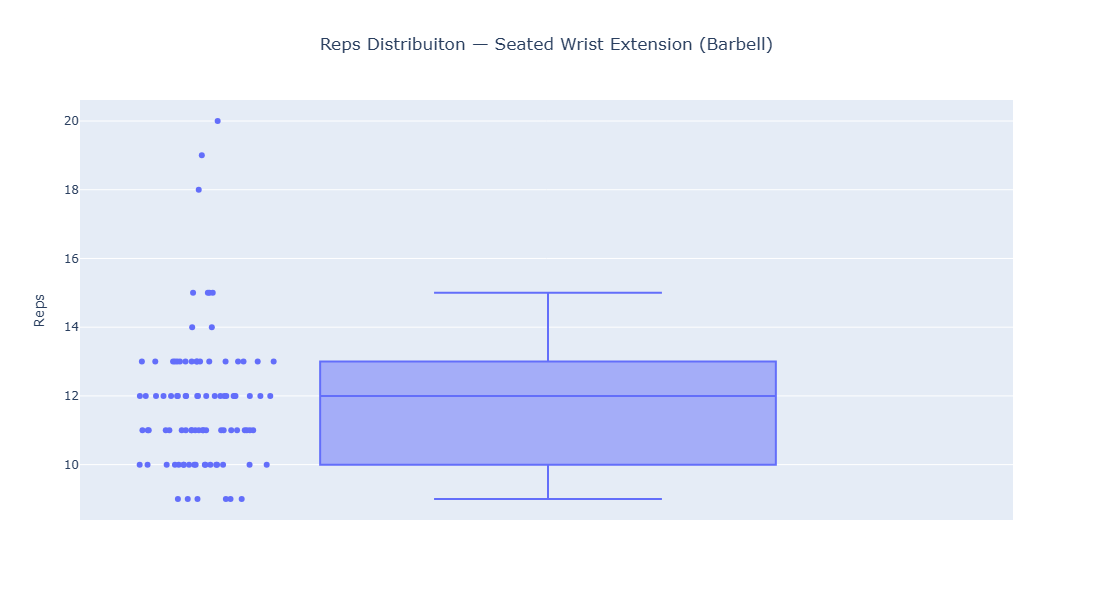

In [75]:
# Seated Wrist Extension (Barbell)
exercise_name = "Seated Wrist Extension (Barbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

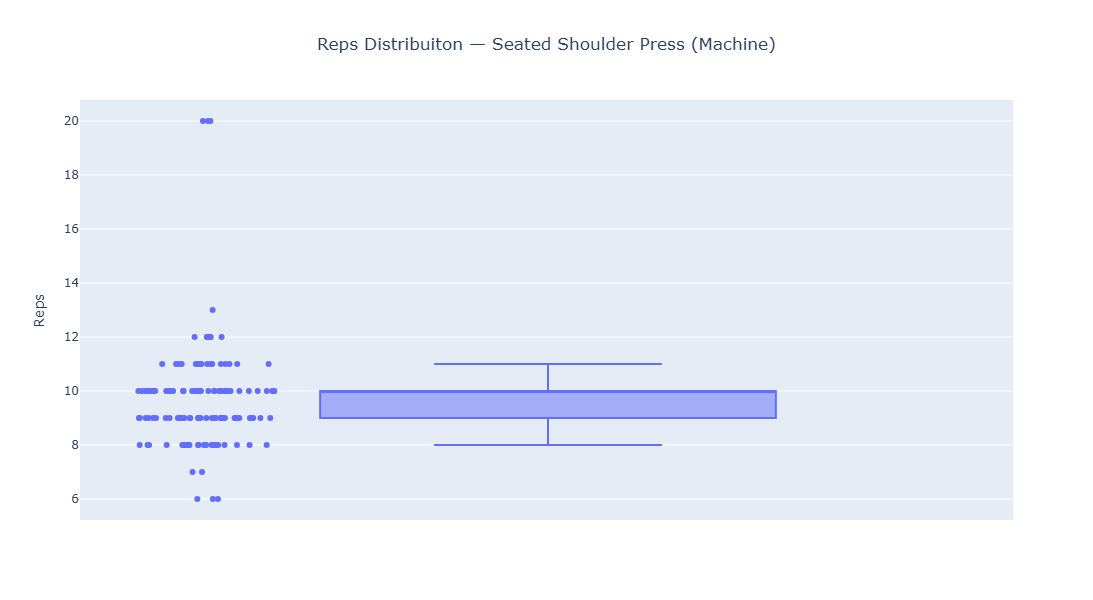

In [76]:
# Seated Shoulder Press (Machine)
exercise_name = "Seated Shoulder Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

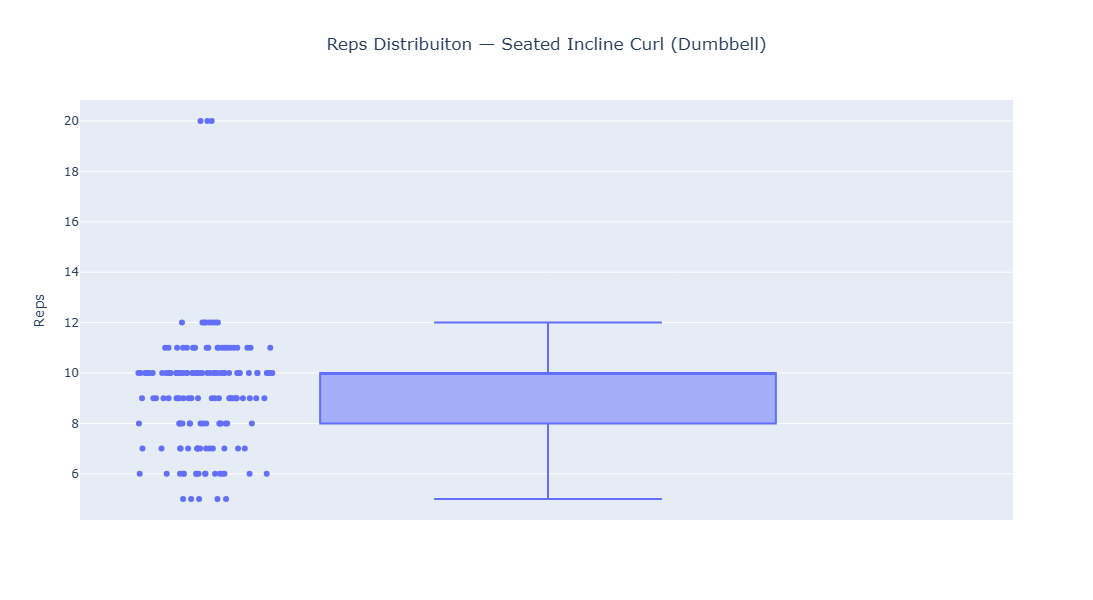

In [77]:
# Seated Incline Curl (Dumbbell)
exercise_name = "Seated Incline Curl (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

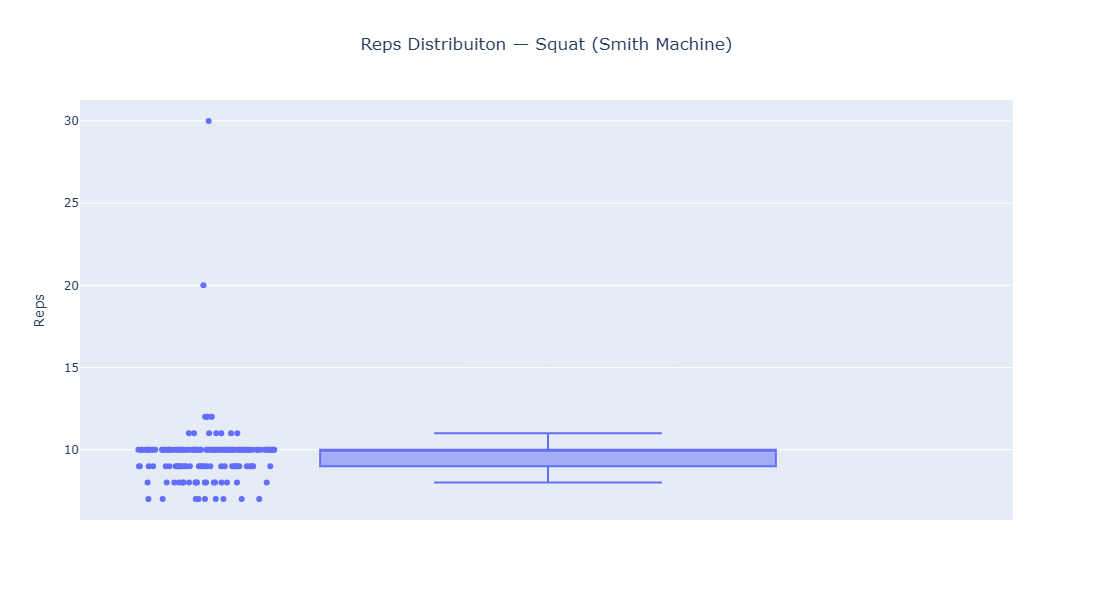

In [78]:
# Squat (Smith Machine)
exercise_name = "Squat (Smith Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de aquecimento sem peso)

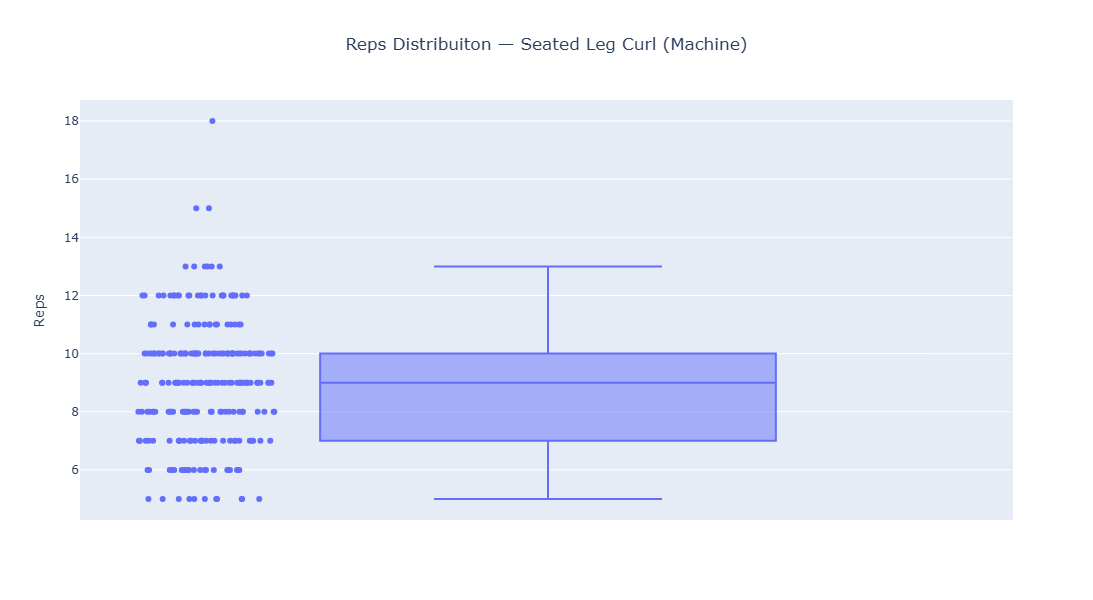

In [80]:
# Seated Leg Curl (Machine)  
exercise_name = "Seated Leg Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

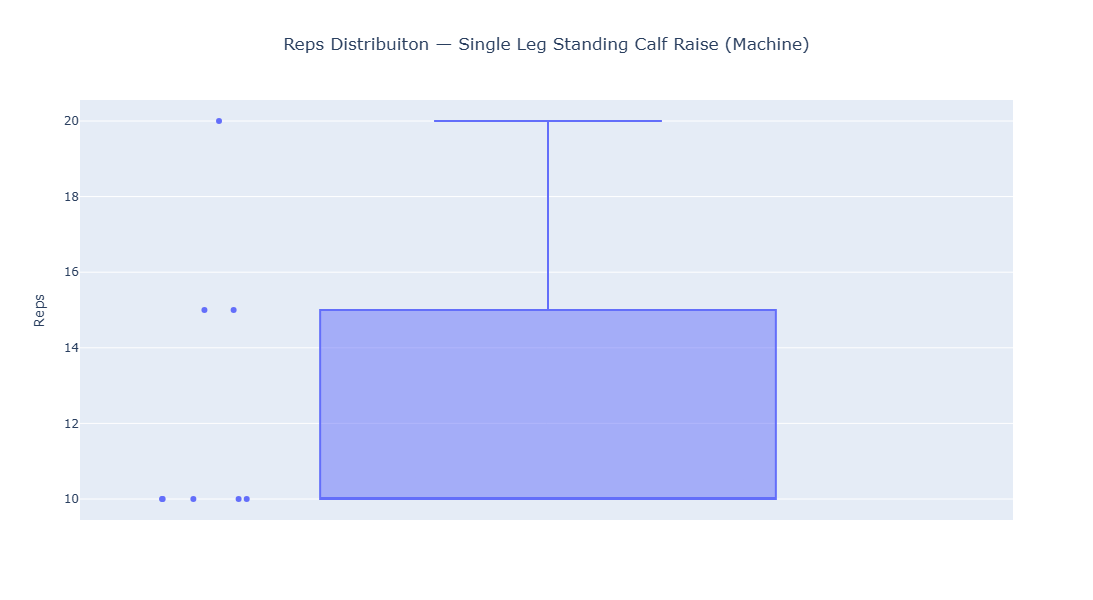

In [81]:
# Single Leg Standing Calf Raise (Machine) 
exercise_name = "Single Leg Standing Calf Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

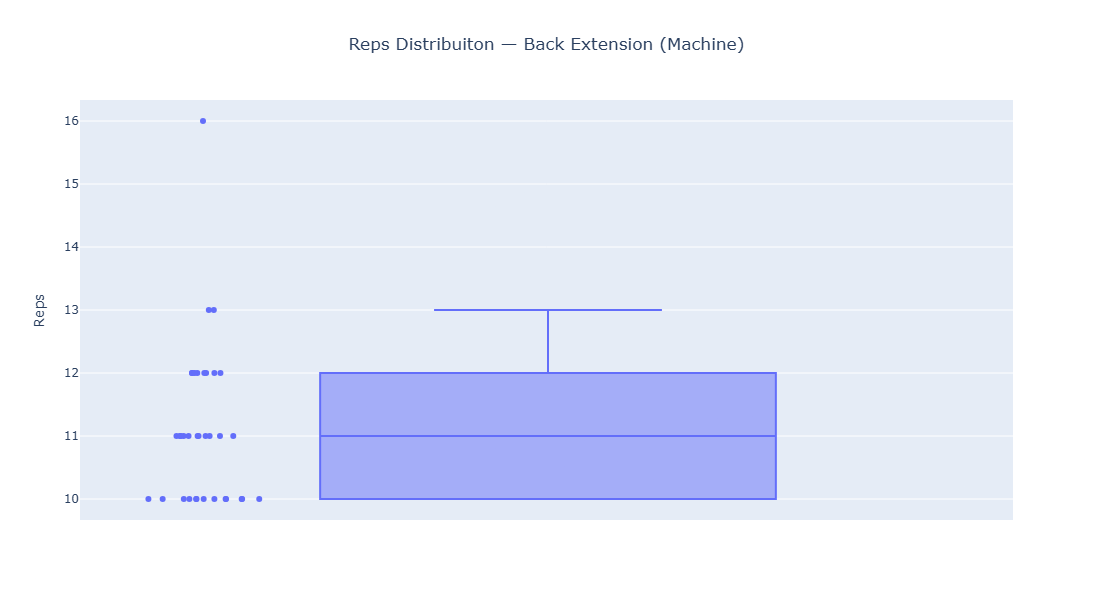

In [82]:
# Back Extension (Machine
exercise_name = "Back Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

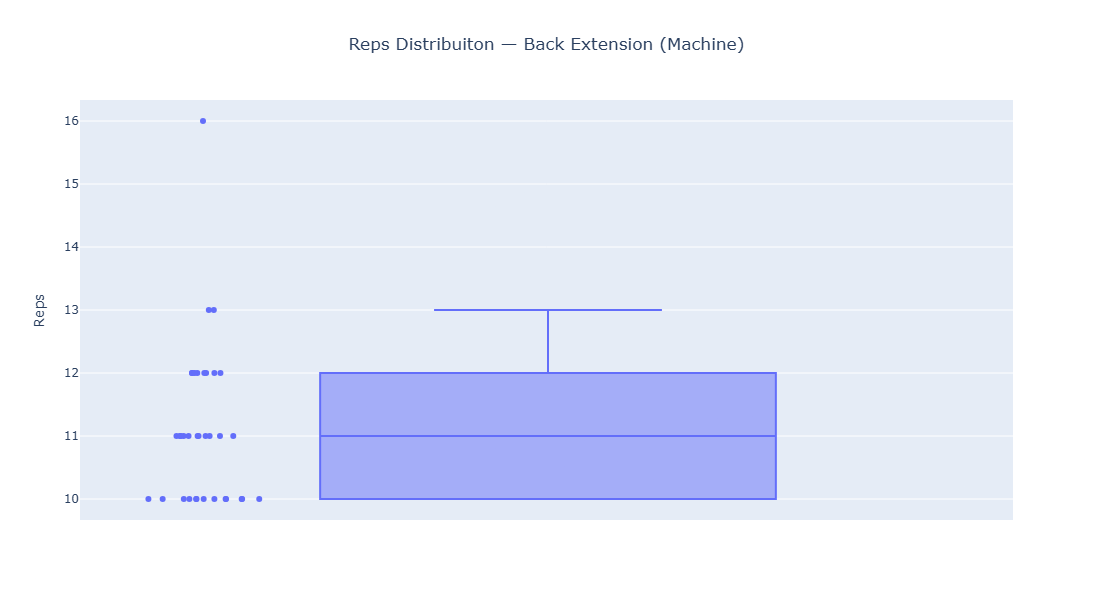

In [83]:
# Back Extension (Machine
exercise_name = "Back Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

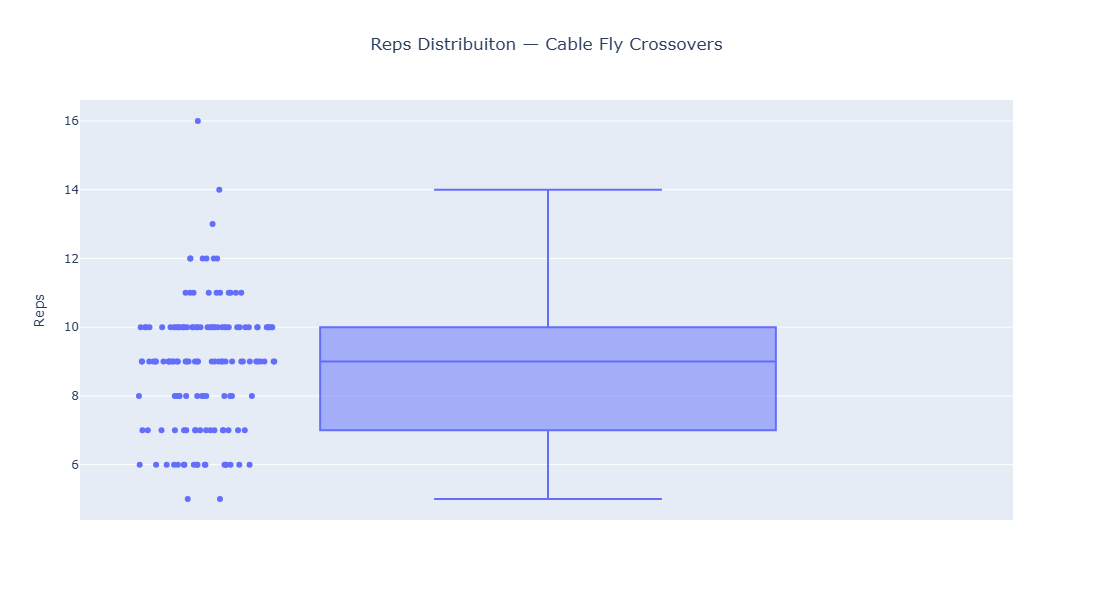

In [85]:
# Cable Fly Crossovers
exercise_name = "Cable Fly Crossovers"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

### Analise Final

In [ ]:
df_hevy_dados.sample(50)

In [ ]:
# Reorganizando colunas
nova_ordem_colunas = [
    'data_treino', 'tempo_treino', 'treino', 'descricao_treino',
    'exercicio', 'serie', 'tipo_serie', 'carga_kg', 'repeticoes',
    '1RM', 'grupo_muscular', 'anotacoes_exercicios', 'ciclo'
]

df_hevy_dados = df_hevy_dados[nova_ordem_colunas]

In [ ]:
df_hevy_dados.sample(10)

In [ ]:
# Salvar o DataFrame transformado em um novo arquivo
df_hevy_dados.to_csv('etl_dfhevy.csv', index=False)